<a href="https://colab.research.google.com/github/ysk8448/Private-Study/blob/main/house_prediction_advanced_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_org = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datas/house_price/house_price_train.csv')
df = df_org.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
print(df.shape)
print('\n전체 피쳐의 type\n', df.dtypes.value_counts())
isnull_series = df.isnull().sum()
print('\n Null column and counts:\n', isnull_series[isnull_series > 0].sort_values(ascending=False))

(1460, 81)

전체 피쳐의 type
 object     43
int64      35
float64     3
Name: count, dtype: int64

 Null column and counts:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


Sale Price가 y(target) 변수이다.

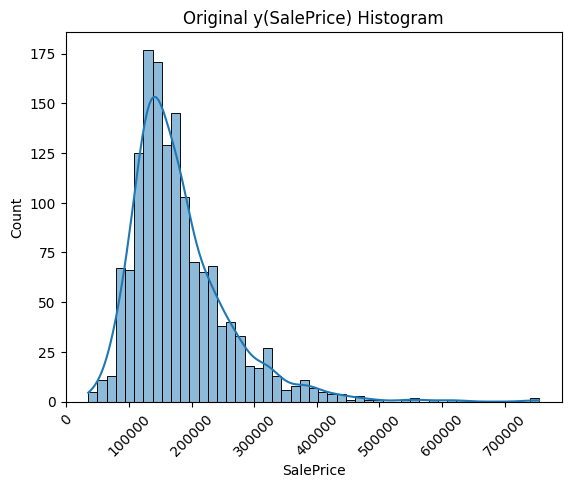

In [8]:
plt.title('Original y(SalePrice) Histogram')
sns.histplot(df['SalePrice'], kde=True)
plt.xticks(rotation=45)
plt.show()

y 그래프는 왜곡도가 조금 있다.

#  전처리

In [9]:
#불필요한 열, 결측치가 너무 많은 열 삭제
df.drop(['Id','PoolQC','MiscFeature','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage'], axis=1, inplace=True)

# 숫자형 열만 추출
numeric_cols = df.select_dtypes(include=['number']).columns
#numeric_cols




In [10]:
isnull_series = df.isnull().sum()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean()) #평균으로 대체


In [11]:
null_col_count = isnull_series[isnull_series > 0]
print('### Null feture type:\n',df.dtypes[null_col_count.index])

### Null feture type:
 MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object


object만 남았다

원 핫 인코딩

In [12]:
print('Get Dummies 수행 전 데이터 shape:',df.shape)
df_ohe = pd.get_dummies(df)
print('Get Dummies 수행 후 데이터 shape:',df_ohe.shape)


Get Dummies 수행 전 데이터 shape: (1460, 73)
Get Dummies 수행 후 데이터 shape: (1460, 266)


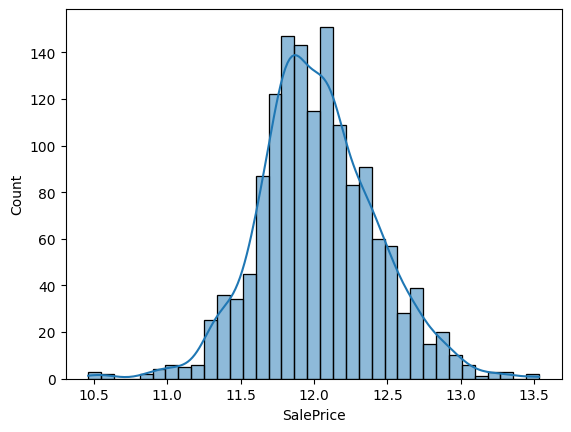

In [13]:
y_org = df_ohe['SalePrice']
df_ohe['SalePrice']= np.log1p(y_org)

sns.histplot(df_ohe['SalePrice'], kde=True)
plt.show()

#  선형회귀모델 OLS 학습/예측/평가

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

def get_rmse(model):
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = np.sqrt(mse)
  print(model.__class__.__name__, 'Log transformed RMSE:',np.round(rmse,3))
  return rmse

def get_rmses(models):
  rmses=[]
  for model in models:
    rmse = get_rmse(model)
    rmses.append(rmse)
  return rmses

In [15]:
y = df_ohe['SalePrice']
X = df_ohe.drop('SalePrice', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


#lr,ridge,lasso
lr = LinearRegression()
lr.fit(X_train, y_train)

ridge = Ridge()
ridge.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train,y_train)

elasticnet = ElasticNet()
elasticnet.fit(X_train,y_train)

models = [lr,ridge,lasso,elasticnet]
get_rmses(models)

LinearRegression Log transformed RMSE: 0.141
Ridge Log transformed RMSE: 0.128
Lasso Log transformed RMSE: 0.19
ElasticNet Log transformed RMSE: 0.183


[0.14112473490980285,
 0.12778423521445353,
 0.19049397680592584,
 0.18271029669820182]

계수 시각화 코드1

계수 시각화 코드2

X데이터 변수들의 왜곡도 측정 단, 카테고리,범주형변수는 제외한 숫자형 변수만 적용해야함.

In [16]:
from scipy.stats import skew

#숫자형 열(오브젝트가 아닌 열)만 추출
non_object_cols = df.dtypes[df.dtypes !='object'].index

#각 열의 왜곡도 일괄 계산
skew_cols = df[non_object_cols].apply(lambda x: skew(x))

#왜곡도가 +-1보다 큰 열만 추출
skew_cols_top = skew_cols[abs(skew_cols) > 1]

#높은순 정렬
print('Skew in numerical features:\n', skew_cols_top.sort_values(ascending=False))

Skew in numerical features:
 MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


높은 왜곡도 -> 로그변환

In [17]:
df[skew_cols_top.index] = np.log1p(df[skew_cols_top.index])

In [18]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
  for model in models:
    rmse_list = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error",cv=5))

    rmse_avg = np.mean(rmse_list)
    print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
    print('{0} CV 평균 RMSE 값: {1}'.format(model.__class__.__name__, np.round(rmse_avg,3)))
    print('{0} CV RMSE 표준편차: {1}'.format(model.__class__.__name__, np.round(rmse_list.std(),3)))

models = [lr,ridge,lasso, elasticnet]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.135 0.164 0.166 0.111 0.195]
LinearRegression CV 평균 RMSE 값: 0.154
LinearRegression CV RMSE 표준편차: 0.029

Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.116 0.185]
Ridge CV 평균 RMSE 값: 0.143
Ridge CV RMSE 표준편차: 0.026

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198
Lasso CV RMSE 표준편차: 0.037

ElasticNet CV RMSE 값 리스트: [0.155 0.198 0.166 0.172 0.257]
ElasticNet CV 평균 RMSE 값: 0.19
ElasticNet CV RMSE 표준편차: 0.036


GridSearchCV로 alpha(hyper parameter)최적화하기

In [19]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
  grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)

  grid_model.fit(X,y)
  rmse = np.sqrt(-1*grid_model.best_score_)
  print('{0} 5 CV 시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))

ridge_params = {'alpha':[0.05,0.1,1,5,8,10,12,15,20,50,70,90,100]}
lasso_parms = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10,15,20,30]}
elasticnet_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10,15,20,30]}

print_best_params(ridge, ridge_params)
print_best_params(lasso, lasso_parms)
print_best_params(elasticnet, elasticnet_params)


Ridge 5 CV 시 최적 평균 RMSE 값:0.14, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값:0.1397, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 RMSE 값:0.1374, 최적 alpha:{'alpha': 0.001}


In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

ridge = Ridge(alpha=12)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

elasticnet = ElasticNet(alpha=0.001)
elasticnet.fit(X_train,y_train)

models = [lr,ridge,lasso,elasticnet]
get_rmses(models)

LinearRegression Log transformed RMSE: 0.141
Ridge Log transformed RMSE: 0.128
Lasso Log transformed RMSE: 0.127
ElasticNet Log transformed RMSE: 0.124


[0.14112473490980285,
 0.12810777234458132,
 0.12726864045634018,
 0.1242839176957389]

In [21]:
df_ohe = pd.get_dummies(df)
y = df_ohe['SalePrice']
X = df_ohe.drop('SalePrice', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print_best_params(ridge, ridge_params)
print_best_params(lasso, lasso_parms)
print_best_params(elasticnet, elasticnet_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.1273, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값:0.1252, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 RMSE 값:0.1235, 최적 alpha:{'alpha': 0.001}


# 이상치 탐지

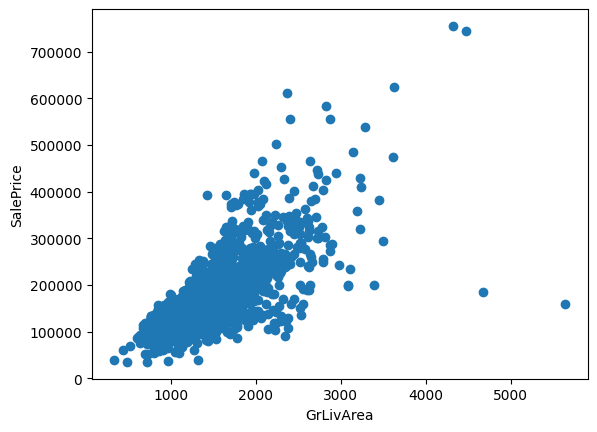

In [22]:
plt.scatter(x = df_org['GrLivArea'], y = df_org['SalePrice'])
plt.xlabel('GrLivArea',fontsize=10)
plt.ylabel('SalePrice', fontsize=10)
plt.show()

평방미터, 즉 집 크기가 클수록 가격은 비싸진다(양의 상관관계) 오른쪽 아래 점 2개는 이상치에 해당한다.

In [23]:
cond1 =df_ohe['GrLivArea']>np.log1p(4000)
cond2 =df_ohe['SalePrice']<np.log1p(500000)
outlier_index = df_ohe[cond1 & cond2].index

print('outlier record index:',outlier_index.values)
print('before deleting outliers:',df_ohe.shape)

df_ohe.drop(outlier_index, axis=0, inplace=True)
print('after deleting outliers:',df_ohe.shape)

outlier record index: [ 523 1298]
before deleting outliers: (1460, 266)
after deleting outliers: (1458, 266)


In [24]:
y = df_ohe['SalePrice']
X = df_ohe.drop('SalePrice', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print_best_params(ridge, ridge_params)
print_best_params(lasso, lasso_parms)
print_best_params(elasticnet, elasticnet_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값:0.1122, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 RMSE 값:0.1102, 최적 alpha:{'alpha': 0.001}


In [25]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

xgb_params = {'n_estimators':[1000]}
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05,colsample_bytree=0.5,subsample=0.8,max_depth=10)
print_best_params(xgb, xgb_params)


# rf_params = {'n_estimators' : [1000]}
# rf = RandomForestRegressor(n_estimators=1000, max_depth=10


# lgbm_params = {'n_estimators' : [1000]}
# rf_params = {'n_estimators' : [1000]}

XGBRegressor 5 CV 시 최적 평균 RMSE 값:0.1254, 최적 alpha:{'n_estimators': 1000}


In [26]:
lgbm_params = {'n_estimators' : [1000]}
lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, colsample_bytree=0.4,subsample=0.6, reg_lambda=10,n_jobs=-1)
print_best_params(lgbm, lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3068
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 168
[LightGBM] [Info] Start training from score 12.021352
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3078
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 165
[LightGBM] [Info] Start training from score 12.023516
[LightGBM] [Warning] Found

In [27]:
def get_rmse_pred(model):
  for key in preds.keys():
    pred = preds[key]
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print('{0}RMSE:{1}'.format(key,rmse))


ridge = Ridge(alpha=8)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

elasticnet = ElasticNet(alpha=0.001)
elasticnet.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
elasticnet_pred = elasticnet.predict(X_test)

pred = 0.4*ridge_pred + 0.3*lasso_pred +0.3*elasticnet_pred
#0.4*ridge_pred + 0.3*lasso_pred +0.3*elasticnet_pred #0.107
#0.4*ridge_pred + 0.6*lasso_pred #0.108
preds = {
    '최종혼합':pred,
    'Ridge':ridge_pred,
    'Lasso':lasso_pred,
    'ElasticNet':elasticnet_pred
}

get_rmse_pred(preds)

최종혼합RMSE:0.10772882688440326
RidgeRMSE:0.10718445761914615
LassoRMSE:0.1107338663639268
ElasticNetRMSE:0.10873926314106773


In [29]:
xgb = XGBRegressor(n_estimators = 1000, learning_rate=0.05,colsample_bytree=0.5,subsample=0.8)
lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, colsample_bytree=0.4,subsample=0.6, reg_lambda=10,n_jobs=-1)

xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
lgbm_pred = lgbm.predict(X_test)

comb_pred_xl = 0.5*xgb_pred + 0.5*lgbm_pred
preds_xl = {
    '최종혼합':comb_pred_xl,
    'XGB':xgb_pred,
    'LGBM':lgbm_pred
}

get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3072
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 166
[LightGBM] [Info] Start training from score 12.028338
최종혼합RMSE:0.10772882688440326
RidgeRMSE:0.10718445761914615
LassoRMSE:0.1107338663639268
ElasticNetRMSE:0.10873926314106773


스태킹 앙상블이란?


In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  kf = KFold(n_splits=n_folds, shuffle=False)

  train_fold_pred = np.zeros((X_train_n.shape[0],1))
  test_pred = np.zeros((X_test_n.shape[0],n_folds))

  print(model.__class__.__name__, 'Model Start')

  for folder_counter, (train_index, val_index) in enumerate(kf.split(X_train_n)):
    print('\t 폴드 세트: ',folder_counter,' 시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[val_index]

    model.fit(X_tr, y_tr)

    train_fold_pred[val_index,:] = model.predict(X_te).reshape(-1,1)
    test_pred[:,folder_counter] = model.predict(X_test_n)

  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

  return train_fold_pred, test_pred_mean


In [38]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

ridge_train, ridge_test = get_stacking_base_datasets(ridge, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso, X_train_n, y_train_n, X_test_n, 5)
xgb_train,xgb_test = get_stacking_base_datasets(xgb, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm, X_train_n, y_train_n, X_test_n, 5)


Ridge Model Start
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
Lasso Model Start
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
XGBRegressor Model Start
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
LGBMRegressor Model Start
	 폴드 세트:  0  시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2870
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 154
[LightGBM] [Info] Start training from score 12.030025
	 폴드 세트:  1  시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM

In [39]:
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

meta_model_lasso = Lasso(alpha=0.0005)

meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:',np.round(rmse,4))



스태킹 회귀 모델의 최종 RMSE 값은: 0.1047
